<a href="https://colab.research.google.com/github/rrahman1215/Assignment-4/blob/main/Assignment4_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

############################## Extract data from the excel file #########################################

# training data
df = pd.read_excel ('/content/drive/MyDrive/Asssignment4_Data.xlsx', sheet_name='Train', usecols=['House ID','Local Price','Bathrooms',	'Land Area',	'Living area',	'# Garages',	'# Rooms',	'# Bedrooms',	'Age of home',	'Construction type'])
np_df = df.to_numpy()
X_train = np_df[:,1:9]
Y_train = np_df[:,-1]

# test data
df = pd.read_excel ('/content/drive/MyDrive/Asssignment4_Data.xlsx', sheet_name='Test', usecols=['House ID','Local Price','Bathrooms',	'Land Area',	'Living area',	'# Garages',	'# Rooms',	'# Bedrooms',	'Age of home',	'Construction type'])
np_df = df.to_numpy()
X_test = np_df[:,1:9]
Y_test = np_df[:,-1]


In [5]:
k = int(input ("Please enter number of neighbors: "))
print('K =',k)
class_predict = []
right_class = 0
wrong_class = 0
for n in range(5):
    apartment = 0
    house = 0
    condo = 0
    for i in range(8):
        test_point = X_test[n,i]
        distance = []
        for d in range(20):
            #distance = np.append(distance, np.absolute(test_point-X_train[d,i]))
            distance = np.append(distance, np.linalg.norm(test_point-X_train[d,i]))
            # print(X_train[d,i])
        b = np.argsort(distance)
        #idx = np.argpartition(distance, k)
        # print(idx)

        #out = Y_train[idx[0:k]]
        out = Y_train[b[0:k]]
        # print(out)
        for m in range(k):        
            if out[m]=='Apartment':
                apartment = apartment + 1
            if out[m]=='House':
                house = house + 1
            if out[m]=='Condo':
                condo = condo + 1

    print('Test set row',n+1,', Votes for: Apartment',apartment,'House',house, 'and Condo', condo)
    # print(house)
    # print(condo)
    if (apartment>=house) & (apartment>condo):
      class_predict = np.append(class_predict, 'Apartment')
    if (house>apartment) & (house>=condo):
      class_predict = np.append(class_predict, 'House')
    if (condo>=apartment) & (condo>house):
      class_predict = np.append(class_predict, 'Condo')
    # print(class_predict)
    if(Y_test[n]==class_predict[n]):
        right_class = right_class + 1
    else:
        wrong_class = wrong_class + 1

print('Accuracy:',(right_class/5))
print(class_predict)
print('\n')

Please enter number of neighbors: 3
K = 3
Test set row 1 , Votes for: Apartment 9 House 7 and Condo 8
Test set row 2 , Votes for: Apartment 12 House 8 and Condo 4
Test set row 3 , Votes for: Apartment 11 House 8 and Condo 5
Test set row 4 , Votes for: Apartment 11 House 9 and Condo 4
Test set row 5 , Votes for: Apartment 12 House 8 and Condo 4
Accuracy: 0.6
['Apartment' 'Apartment' 'Apartment' 'Apartment' 'Apartment']




In [6]:
# Accuracy determination for k values ranging from 1 to 5

accuracy_array = []
k_array = []
for k in range(1,6):
  print('K =',k)
  class_predict = []
  right_class = 0
  wrong_class = 0
  for n in range(5):
    apartment = 0
    house = 0
    condo = 0
    for i in range(8):
        test_point = X_test[n,i]
        distance = []
        for d in range(20):
            #distance = np.append(distance, np.absolute(test_point-X_train[d,i]))
            distance = np.append(distance, np.linalg.norm(test_point-X_train[d,i]))
            # print(X_train[d,i])
        b = np.argsort(distance)
        #idx = np.argpartition(distance, k)
        # print(idx)

        #out = Y_train[idx[0:k]]
        out = Y_train[b[0:k]]
        # print(out)
        for m in range(k):        
            if out[m]=='Apartment':
                apartment = apartment + 1
            if out[m]=='House':
                house = house + 1
            if out[m]=='Condo':
                condo = condo + 1

    print('Test set row',n+1,', Votes for: Apartment',apartment,'House',house, 'and Condo', condo)
    # print(house)
    # print(condo)
    if (apartment>=house) & (apartment>condo):
      class_predict = np.append(class_predict, 'Apartment')
    if (house>apartment) & (house>=condo):
      class_predict = np.append(class_predict, 'House')
    if (condo>=apartment) & (condo>house):
      class_predict = np.append(class_predict, 'Condo')
    # print(class_predict)
    if(Y_test[n]==class_predict[n]):
        right_class = right_class + 1
    else:
        wrong_class = wrong_class + 1

  accuracy_array = np.append(accuracy_array,(right_class/5))
  k_array = np.append(k_array,k)
  print('Accuracy:',(right_class/5))
  print(class_predict)
  print('\n')


K = 1
Test set row 1 , Votes for: Apartment 4 House 1 and Condo 3
Test set row 2 , Votes for: Apartment 6 House 2 and Condo 0
Test set row 3 , Votes for: Apartment 7 House 1 and Condo 0
Test set row 4 , Votes for: Apartment 5 House 2 and Condo 1
Test set row 5 , Votes for: Apartment 4 House 2 and Condo 2
Accuracy: 0.6
['Apartment' 'Apartment' 'Apartment' 'Apartment' 'Apartment']


K = 2
Test set row 1 , Votes for: Apartment 7 House 5 and Condo 4
Test set row 2 , Votes for: Apartment 9 House 6 and Condo 1
Test set row 3 , Votes for: Apartment 7 House 6 and Condo 3
Test set row 4 , Votes for: Apartment 8 House 6 and Condo 2
Test set row 5 , Votes for: Apartment 7 House 7 and Condo 2
Accuracy: 0.6
['Apartment' 'Apartment' 'Apartment' 'Apartment' 'Apartment']


K = 3
Test set row 1 , Votes for: Apartment 9 House 7 and Condo 8
Test set row 2 , Votes for: Apartment 12 House 8 and Condo 4
Test set row 3 , Votes for: Apartment 11 House 8 and Condo 5
Test set row 4 , Votes for: Apartment 11 Hou

Text(0, 0.5, 'Accuracy')

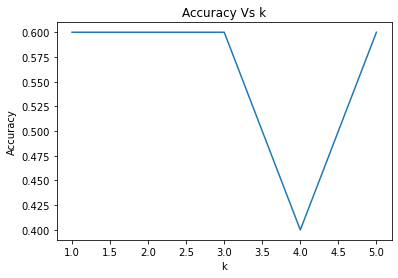

In [7]:
plt.figure
plt.plot(k_array,accuracy_array)
plt.title('Accuracy Vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')